In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.houseinrwanda.com"
endpoint = "/for-rent"
url = base_url + endpoint

headers = {
    "User-Agent": "Mozilla/5.0"
}

In [12]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
soup


<!-- THEME DEBUG -->
<!-- THEME HOOK: 'html' -->
<!-- FILE NAME SUGGESTIONS:
   * html--for-rent.html.twig
   x html.html.twig
-->
<!-- BEGIN OUTPUT from 'themes/contrib/bootstrap_barrio/templates/layout/html.html.twig' -->
<!DOCTYPE html>

<html dir="ltr" lang="en" prefix="og: https://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-107151364-1"></script>
<script>window.dataLayer=window.dataLayer||[];function gtag(){dataLayer.push(arguments)};gtag("js",new Date());gtag("set","developer_id.dMDhkMT",true);gtag("config","UA-107151364-1",{"groups":"default","anonymize_ip":true,"page_placeholder":"PLACEHOLDER_page_path","allow_ad_personalization_signals":false});</script>
<link href="https://www.houseinrwanda.com/for-rent" rel="canonical"/>
<meta content="Drupal 9 (https://www.drupal.org)" name="Generator"/>
<meta content="width" name="MobileOptimized"/>
<meta content="true" name="HandheldFriendly"/>
<meta content="width=devi

In [4]:
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")
cards = soup.find_all("div", class_="col-10")

In [5]:
print(len(cards))  # Should print number of house listings

206


In [6]:
for card in cards:
    p_tags = card.find_all("p", class_="mb-0")
    for p in p_tags:
        print(p.text)


Published on 9 May
| Expires on 10 June


Advert: Rent,
                Property: House
                ,
                  Bedroom: 4,
                  Bathrooms: 4
                              

Published on 9 May
| Expires on 31 August


Advert: Rent,
                Property: House
                ,
                  Bedroom: 3,
                  Bathrooms: 3
                              

Published on 8 May
| Expires on 8 August


Advert: Rent,
                Property: House
                ,
                  Bedroom: 4,
                  Bathrooms: 3
                              

Published on 27 March
| Expires on 6 June


Advert: Rent,
                Property: House
                ,
                  Bedroom: 4,
                  Bathrooms: 3
                              

Published on 22 May
| Expires on 24 August


Advert: Rent,
                Property: Apartment
                ,
                  Bedroom: 2,
                  Bathrooms: 2
                        

In [10]:
cards = soup.find_all("div", class_="card listing-card")
# Data storage
listings = []

for card in cards:
    try:
        # Title and Link
        title_tag = card.find("h5", class_="card-title").find("a")
        title = title_tag.text.strip()
        link = base_url + title_tag['href']

        # Price
        price_tag = card.find("span", class_="badge bg-light text-dark")
        price = price_tag.text.strip().replace('\n', ' ') if price_tag else "None"

        # Location
        location_tag = card.find("i", class_="fa fa-map-marker-alt")
        location = location_tag.find_parent("span").text.strip() if location_tag else "None"

        # Dates
        date_tags = card.find_all("span", style="white-space: nowrap")
        published_date = date_tags[0].text.replace("Published on ", "").strip() if len(date_tags) > 0 else "None"
        expiry_date = date_tags[1].text.replace("| Expires on ", "").strip() if len(date_tags) > 1 else "None"

        # Posted by
        posted_by_tag = card.find("a", href=True)
        posted_by = posted_by_tag.text.strip() if posted_by_tag else "None"

        # Details: Advert, Property, Bedrooms, Bathrooms
        advert_type = property_type = bedrooms = bathrooms = "None"
        p_tags = card.find_all("p", class_="mb-0")
        for p in p_tags:
            text = p.text
            if "Advert:" in text:
                advert_type = text.split("Advert:")[1].split(",")[0].strip()
            if "Property:" in text:
                property_type = text.split("Property:")[1].split(",")[0].strip()
            if "Bedroom:" in text:
                bedrooms = text.split("Bedroom:")[1].split(",")[0].strip()
            if "Bathrooms:" in text:
                bathrooms = text.split("Bathrooms:")[1].strip()

        # Reference Code
        ref_tag = card.find("small", class_="text-muted")
        reference_code = ref_tag.text.replace("| Ref: ", "").strip() if ref_tag else "None"

        # Property Video
        video_icon = card.find("i", class_=lambda c: c and "fa-youtube" in c)
        property_video = "Available" if video_icon else "None"

        # Append result
        listings.append({
            "Property Title": title,
            "Property Link": link,
            "Property Price": price,
            "Property Location": location,
            "Published Date": published_date,
            "Expiry Date": expiry_date,
            "Posted By": posted_by,
            "Advert Type": advert_type,
            "Property Type": property_type,
            "Number of Bedrooms": bedrooms,
            "Number of Bathrooms": bathrooms,
            "Reference Code": reference_code,
            "Property Video": property_video
        })

    except Exception as e:
        continue

# Convert to DataFrame
df = pd.DataFrame(listings)

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define base URL and headers
base_url = "https://www.houseinrwanda.com"
endpoint = "/for-rent"
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Function to extract data from one page
def extract_data_from_page(url):
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    cards = soup.find_all("div", class_="col-10")

    listings = []
    for card in cards:
        try:
            # Title and Link
            title_tag = card.find("h5", class_="card-title").find("a")
            title = title_tag.text.strip()
            link = base_url + title_tag['href']

            # Price
            price_tag = card.find("span", class_="badge bg-light text-dark")
            price = price_tag.text.strip().replace('\n', ' ') if price_tag else "None"

            # Location
            location_tag = card.find("i", class_="fa fa-map-marker-alt")
            location = location_tag.find_parent("span").text.strip() if location_tag else "None"

            # Dates
            date_tags = card.find_all("span", style="white-space: nowrap")
            published_date = date_tags[0].text.replace("Published on ", "").strip() if len(date_tags) > 0 else "None"
            expiry_date = date_tags[1].text.replace("| Expires on ", "").strip() if len(date_tags) > 1 else "None"

            # Posted by
            posted_by_tag = card.find("a", href=True)
            posted_by = posted_by_tag.text.strip() if posted_by_tag else "None"

            # Details (Advert, Property, Bedrooms, Bathrooms)
            advert_type = property_type = bedrooms = bathrooms = "None"
            p_tags = card.find_all("p", class_="mb-0")
            for p in p_tags:
                text = p.text
                if "Advert:" in text:
                    advert_type = text.split("Advert:")[1].split(",")[0].strip()
                if "Property:" in text:
                    property_type = text.split("Property:")[1].split(",")[0].strip()
                if "Bedroom:" in text:
                    bedrooms = text.split("Bedroom:")[1].split(",")[0].strip()
                if "Bathrooms:" in text:
                    bathrooms = text.split("Bathrooms:")[1].strip()

            # Reference Code
            ref_tag = card.find("small", class_="text-muted")
            reference_code = ref_tag.text.replace("| Ref: ", "").strip() if ref_tag else "None"

            # Property Video
            video_icon = card.find("i", class_=lambda c: c and "fa-youtube" in c)
            property_video = "Available" if video_icon else "None"

            # Append result
            listings.append({
                "Property Title": title,
                "Property Link": link,
                "Property Price": price,
                "Property Location": location,
                "Published Date": published_date,
                "Expiry Date": expiry_date,
                "Posted By": posted_by,
                "Advert Type": advert_type,
                "Property Type": property_type,
                "Number of Bedrooms": bedrooms,
                "Number of Bathrooms": bathrooms,
                "Reference Code": reference_code,
                "Property Video": property_video
            })

        except Exception as e:
            continue
    return listings

# Define the URL for the page
url = base_url + endpoint

# Extract data from the page
data = extract_data_from_page(url)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())

                                      Property Title  \
0  Kigali fully furnished luxury villa for rent o...   
1  Kigali Beautiful Furnished House for Rent In K...   
2  Kigali Spacious 4-Bedroom Furnished House for ...   
3  Charming Home for Rent in Rusororo, Kigali wit...   
4  Kigali Modern furnished apartment for rent in ...   

                                       Property Link       Property Price  \
0  https://www.houseinrwanda.com/property/rent/ho...      2,000 USD/month   
1  https://www.houseinrwanda.com/property/rent/ho...      1,000 USD/month   
2  https://www.houseinrwanda.com/property/rent/ho...  1,000,000 RWF/month   
3  https://www.houseinrwanda.com/property/rent/ho...        800 USD/month   
4  https://www.houseinrwanda.com/property/rent/ap...        800 USD/month   

                 Property Location Published Date Expiry Date  \
0    Kigali City, Gasabo, Kinyinya          9 May     10 June   
1  Kigali City, Kicukiro, Kagarama          9 May   31 August   
2    

In [14]:
url = base_url + endpoint
data = extract_data_from_page(url)
df = pd.DataFrame(data)
df.head()

,Property Title,Property Link,Property Price,Property Location,Published Date,Expiry Date,Posted By,Advert Type,Property Type,Number of Bedrooms,Number of Bathrooms,Reference Code,Property Video
0,Kigali fully furnished luxury villa for rent o...,https://www.houseinrwanda.com/property/rent/ho...,"2,000 USD/month","Kigali City, Gasabo, Kinyinya",9 May,10 June,Kigali fully furnished luxury villa for rent o...,Rent,House,4,4,NENAIANUZ2,Available
1,Kigali Beautiful Furnished House for Rent In K...,https://www.houseinrwanda.com/property/rent/ho...,"1,000 USD/month","Kigali City, Kicukiro, Kagarama",9 May,31 August,Kigali Beautiful Furnished House for Rent In K...,Rent,House,3,3,4U36QUFAT3,Available
2,Kigali Spacious 4-Bedroom Furnished House for ...,https://www.houseinrwanda.com/property/rent/ho...,"1,000,000 RWF/month","Kigali City, Gasabo, Gisozi",8 May,8 August,Kigali Spacious 4-Bedroom Furnished House for ...,Rent,House,4,3,41ARBVFWFP,None
3,"Charming Home for Rent in Rusororo, Kigali wit...",https://www.houseinrwanda.com/property/rent/ho...,800 USD/month,"Kigali City, Gasabo, Rusororo",27 March,6 June,"Charming Home for Rent in Rusororo, Kigali wit...",Rent,House,4,3,W81HD6K1L8,Available
4,Kigali Modern furnished apartment for rent in ...,https://www.houseinrwanda.com/property/rent/ap...,800 USD/month,"Kigali City, Kicukiro, Niboye",22 May,24 August,Kigali Modern furnished apartment for rent in ...,Rent,Apartment,2,2,YH5XKGXXBY,Available


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

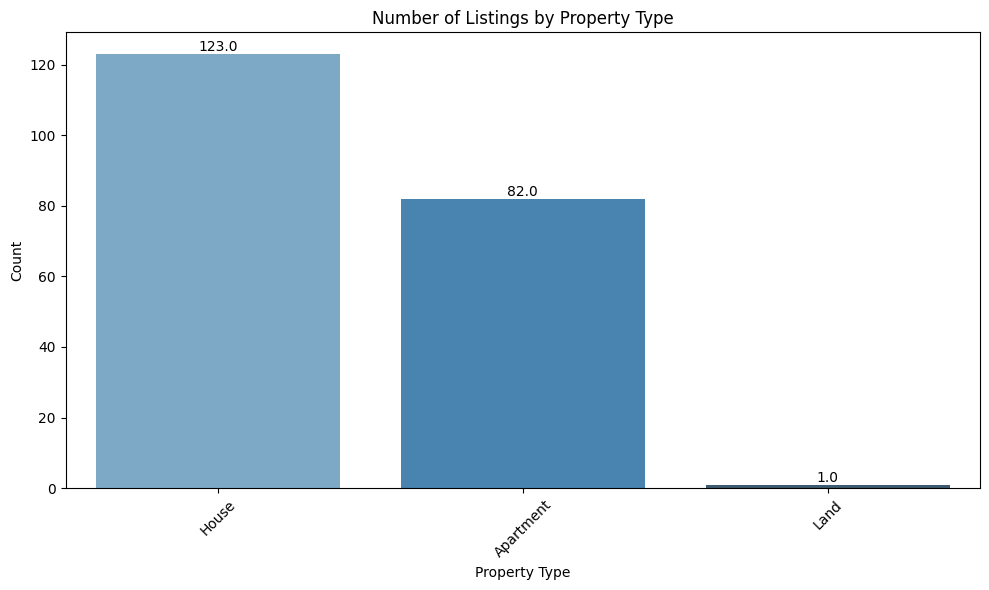

In [16]:
# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x="Property Type",
    hue="Property Type",
    dodge=False,
    order=df["Property Type"].value_counts().index,
    palette="Blues_d",
    legend=False
)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Customize layout
plt.title("Number of Listings by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-27-3888c353e8ec>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


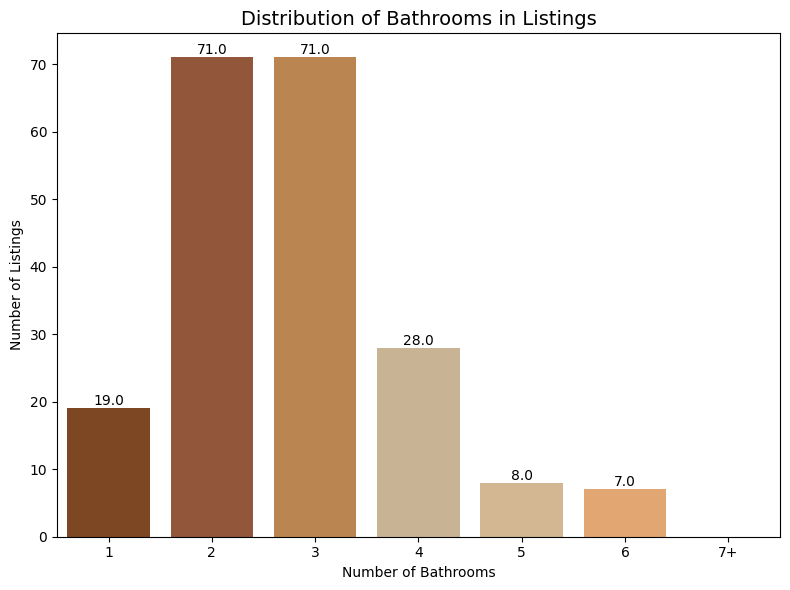

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Clean and standardize 'Number of Bathrooms'
# First, convert to numeric, coerce errors into NaN
df['Bathrooms Cleaned'] = pd.to_numeric(df['Number of Bathrooms'], errors='coerce')

# Step 2: Convert values >6 to '7+' and others to strings for consistent plotting
df['Bathrooms Category'] = df['Bathrooms Cleaned'].apply(
    lambda x: '7+' if pd.notnull(x) and x > 6 else str(int(x)) if pd.notnull(x) else None
)

# Step 3: Define the desired order
bathroom_order = ['1', '2', '3', '4', '5', '6', '7+']

# Step 4: Brown color palette (7 shades for 7 categories)
brown_palette = ["#8B4513", "#A0522D", "#CD853F", "#D2B48C", "#DEB887", "#F4A460", "#A0522D"]

# Step 5: Plotting
plt.figure(figsize=(8, 6))
ax = sns.countplot(
    data=df,
    x='Bathrooms Category',
    order=bathroom_order,
    palette=brown_palette
)

# Step 6: Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Final Touches
plt.title("Distribution of Bathrooms in Listings", fontsize=14)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

<ipython-input-29-214b2c99362d>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


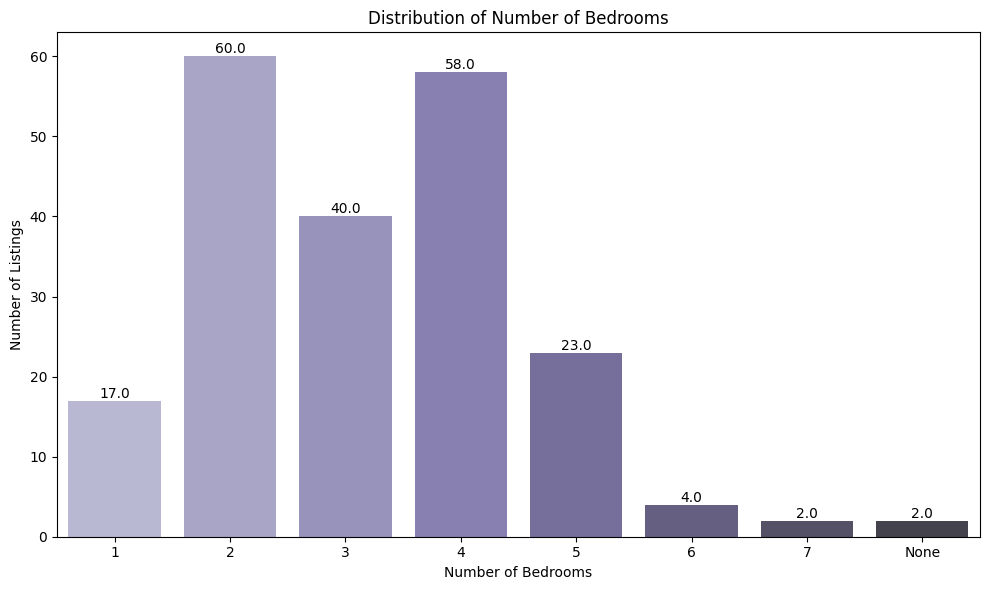

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Clean the 'Number of Bedrooms' column
df['Bedrooms Cleaned'] = pd.to_numeric(df['Number of Bedrooms'], errors='coerce')

# Step 2: Categorize into 1–7, others as "None"
def categorize_bedrooms(x):
    if pd.isnull(x):
        return "None"
    elif 1 <= x <= 7:
        return str(int(x))
    else:
        return "None"

df['Bedrooms Category'] = df['Bedrooms Cleaned'].apply(categorize_bedrooms)

# Step 3: Define the final order for the chart
bedroom_order = [str(i) for i in range(1, 8)] + ["None"]

# Step 4: Plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=df,
    x='Bedrooms Category',
    order=bedroom_order,
    palette="Purples_d"
)

# Step 5: Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Final touches
plt.title("Distribution of Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Number of Listings")
plt.tight_layout()
plt.show()

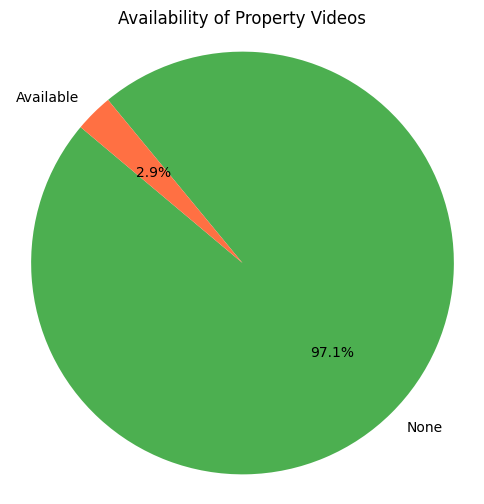

In [21]:
video_counts = df["Property Video"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(video_counts, labels=video_counts.index, autopct='%1.1f%%', startangle=140, colors=["#4CAF50", "#FF7043"])
plt.title("Availability of Property Videos")
plt.axis('equal')
plt.show()

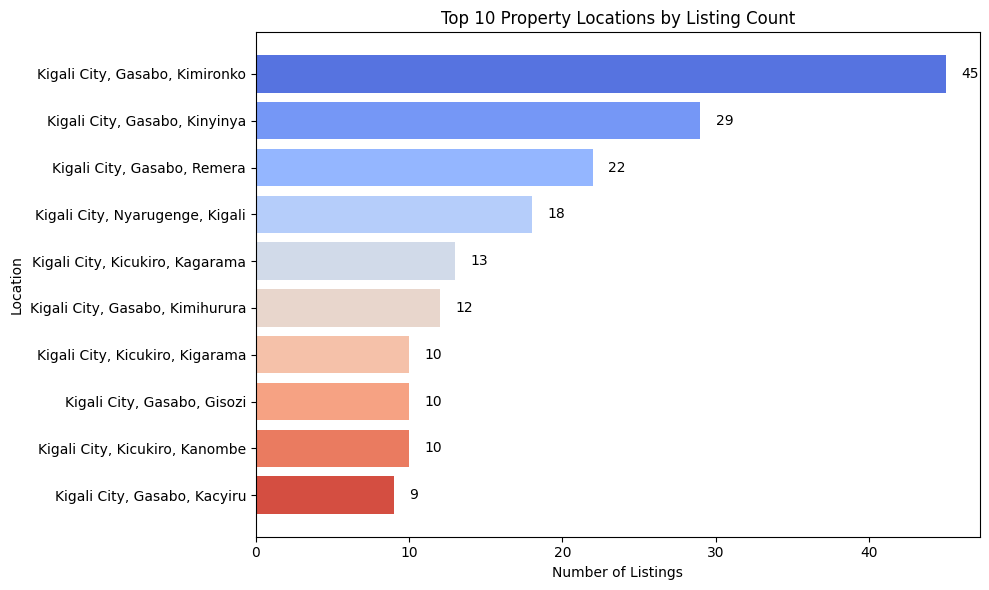

In [22]:
# Get top 10 locations
top_locations = df["Property Location"].value_counts().nlargest(10)

# Define colors
colors = sns.color_palette("coolwarm", n_colors=10)

# Create plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_locations.index, top_locations.values, color=colors)

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height() / 2,
             f'{int(width)}', va='center')

plt.title("Top 10 Property Locations by Listing Count")
plt.xlabel("Number of Listings")
plt.ylabel("Location")
plt.tight_layout()
plt.gca().invert_yaxis()  # Optional: put highest on top
plt.show()

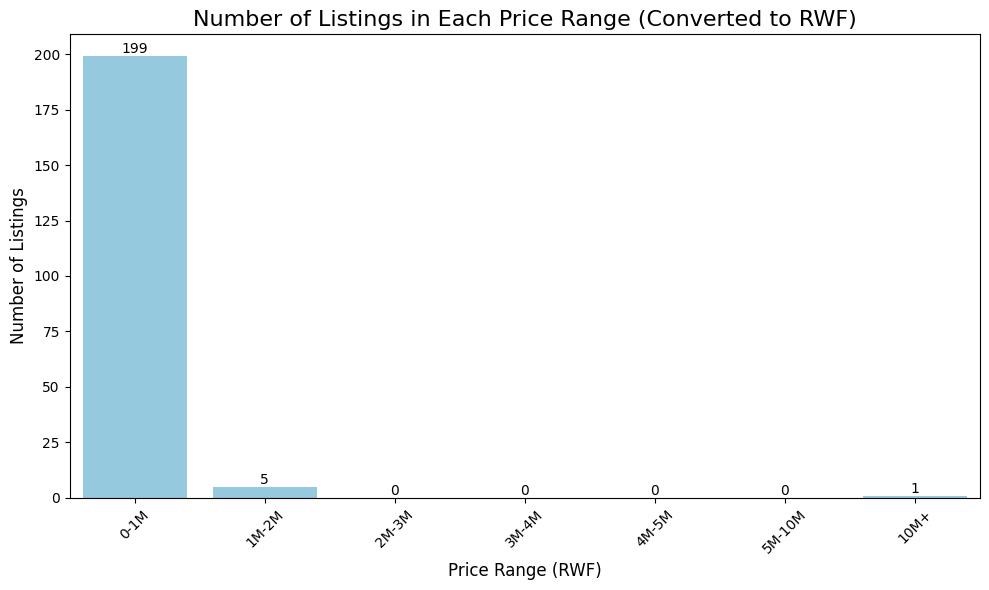

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example conversion rates (adjust as needed)
conversion_rates = {
    'USD': 1200,
    'EUR': 1300
}

# Step 1: Clean the 'Property Price' column
df['Cleaned Price'] = df['Property Price'].str.replace("RWF", "", regex=False)
df['Cleaned Price'] = df['Cleaned Price'].str.replace(",", "")
df['Cleaned Price'] = df['Cleaned Price'].str.replace(r'\D+', '', regex=True)
df['Cleaned Price'] = pd.to_numeric(df['Cleaned Price'], errors='coerce')

# Step 2: Define conversion function
def convert_to_rwf(price):
    if isinstance(price, str):
        if 'USD' in price:
            return float(price.replace("USD", "").strip()) * conversion_rates['USD']
        elif 'EUR' in price:
            return float(price.replace("EUR", "").strip()) * conversion_rates['EUR']
        else:
            return price
    return price

# Step 3: Apply conversion
df['Cleaned Price'] = df['Cleaned Price'].apply(lambda x: convert_to_rwf(x) if isinstance(x, str) else x)

# Step 4: Create price bins and labels
price_bins = [0, 1000000, 2000000, 3000000, 4000000, 5000000, 10000000, 20000000]
price_labels = ['0-1M', '1M-2M', '2M-3M', '3M-4M', '4M-5M', '5M-10M', '10M+']
df['Price Range'] = pd.cut(df['Cleaned Price'], bins=price_bins, labels=price_labels, right=False)

# Step 5: Count listings in each range
price_range_counts = df['Price Range'].value_counts().sort_index()

# Step 6: Plotting with data labels
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=price_range_counts.index, y=price_range_counts.values, color='skyblue')

# Add data labels on each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

# Final plot formatting
plt.title("Number of Listings in Each Price Range (Converted to RWF)", fontsize=16)
plt.xlabel("Price Range (RWF)", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()